[  7.12111935   3.51098928   6.23108016   4.15005864   3.13581498
   6.45039364   6.92599003   3.82411027   4.89010164  20.           3.61912965
   2.83493554   0.81829783   3.14821833   0.25750454   1.24075442
   4.34537882   1.24775157   1.95585869   2.39395487]
(0, 9.2274656)
(100, 3.6599455)
(200, 3.5217903)
(300, 3.518265)
(400, 3.5181751)
(500, 3.5181727)
(600, 3.5181725)
(700, 3.5181725)
(800, 3.5181727)
(900, 3.5181727)
('learned parameters', array([ 0.79417914, -0.06678207], dtype=float32))
('accuracy', 0.80000001)


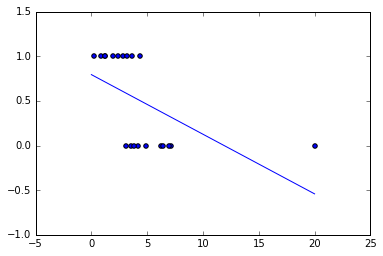

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_label0 = np.random.normal(5,1,10)
x_label1 = np.random.normal(2,1,10)
x_label0[9] = 20

xs = np.append(x_label0, x_label1)
print(xs)
labels = [0.] * len(x_label0) + [1.] * len(x_label1)

plt.scatter(xs, labels)

learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
  return tf.add(tf.multiply(w[1], tf.pow(X, 1)),
                tf.multiply(w[0], tf.pow(X, 0)))
w = tf.Variable([0., 0.], name="parameters")
y_model = model(X,w)
cost = tf.reduce_sum(tf.square(Y-y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
  sess.run(train_op, feed_dict={X:xs, Y:labels})
  current_cost = sess.run(cost, feed_dict={X:xs, Y:labels})
  if epoch % 100 == 0:
    print(epoch, current_cost)
    
w_val = sess.run(w)
print('learned parameters', w_val)
correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))
print('accuracy', sess.run(accuracy, feed_dict={X:xs, Y: labels}))
sess.close()

all_xs = np.linspace(0, 20, 100)
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.show()

(0, 0.69314593)
(1, 0.65204436)
(2, 0.61513102)
(3, 0.58194578)
(4, 0.55206192)
(5, 0.52509278)
(6, 0.50069338)
(7, 0.47855952)
(8, 0.458424)
(9, 0.440054)
(10, 0.42324653)
(11, 0.40782493)
(12, 0.39363581)
(13, 0.38054559)
(14, 0.36843747)
(15, 0.35720974)
(16, 0.34677348)
(17, 0.33705053)
(18, 0.32797223)
(19, 0.31947798)
(20, 0.31151432)
(21, 0.30403394)
(22, 0.29699439)
(23, 0.29035851)
(24, 0.28409266)
(25, 0.27816698)
(26, 0.27255437)
(27, 0.26723087)
(28, 0.26217467)
(29, 0.25736579)
(30, 0.25278661)
(31, 0.24842086)
(32, 0.2442539)
(33, 0.24027222)
(34, 0.23646368)
(35, 0.23281705)
(36, 0.22932205)
(37, 0.2259692)
(38, 0.2227499)
(39, 0.21965621)
(40, 0.21668087)
(41, 0.21381681)
(42, 0.21105811)
(43, 0.20839871)
(44, 0.20583321)
(45, 0.20335668)
(46, 0.2009645)
(47, 0.19865228)
(48, 0.19641586)
(49, 0.19425179)
(50, 0.19215611)
(51, 0.19012588)
(52, 0.18815783)
(53, 0.18624911)
(54, 0.18439691)
(55, 0.18259875)
(56, 0.18085234)
(57, 0.17915516)
(58, 0.17750528)
(59, 0.17590065

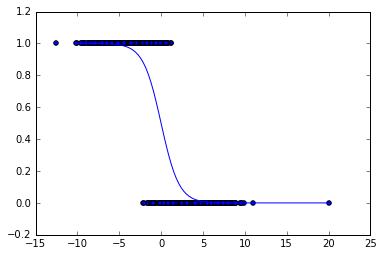

In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

learning_rate = 0.01
training_epochs = 1000

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
x2[9] = 20
xs = np.append(x1, x2)
ys = np.asarray([1.] * len(x1) + [0.] * len(x2))

plt.scatter(xs, ys)

X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0.], name="parameter", trainable=True)
y_model = tf.sigmoid(w[1] * X + w[0])
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys})
        print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X: xs, Y: ys})
        

all_xs = np.linspace(-10, 20, 100)
plt.plot(all_xs, sigmoid(all_xs * w_val[1] + w_val[0]))
plt.show()

[ 0.  0.  0. ...,  1.  1.  1.]
(0, 0.69314593)
(1, 0.60804552)
(2, 0.60115248)
(3, 0.59628004)
(4, 0.59154427)
(5, 0.58692884)
(6, 0.5824284)
(7, 0.57803869)
(8, 0.57375485)
(9, 0.56957221)
(10, 0.56548697)
(11, 0.56149507)
(12, 0.55759245)
(13, 0.55377567)
(14, 0.55004126)
(15, 0.54638565)
(16, 0.54280585)
(17, 0.53929883)
(18, 0.53586179)
(19, 0.5324918)
(20, 0.52918637)
(21, 0.52594286)
(22, 0.52275926)
(23, 0.51963282)
(24, 0.51656169)
(25, 0.51354384)
(26, 0.51057714)
(27, 0.50766027)
(28, 0.50479078)
(29, 0.50196707)
(30, 0.49918824)
(31, 0.49645215)
(32, 0.49375707)
(33, 0.49110249)
(34, 0.48848674)
(35, 0.485908)
(36, 0.48336577)
(37, 0.48085859)
(38, 0.47838569)
(39, 0.47594568)
(40, 0.47353777)
(41, 0.47116074)
(42, 0.46881405)
(43, 0.46649671)
(44, 0.46420771)
(45, 0.46194628)
(46, 0.45971209)
(47, 0.45750412)
(48, 0.45532158)
(49, 0.45316395)
(50, 0.45103055)
(51, 0.44892082)
(52, 0.44683409)
(53, 0.44476989)
(54, 0.44272748)
(55, 0.44070685)
(56, 0.43870699)
(57, 0.4367277

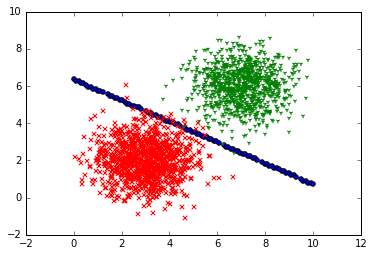

In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

learning_rate = 0.1
training_epochs = 2000

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)
x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))
print(ys)
X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name="x2") 
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0., 0.], name="w", trainable=True)

y_model = tf.sigmoid(w[2] * X2 + w[1] * X1 + w[0])
cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1 - Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y: ys})
        print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X1: x1s, X2: x2s, Y: ys})
    
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test*w_val[2] - x1_test*w_val[1] - w_val[0])
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)

plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)
plt.show()

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def traindata():
    x1_label0 = np.random.normal(1, 1, (100, 1))
    x2_label0 = np.random.normal(1, 1, (100, 1))
    x1_label1 = np.random.normal(5, 1, (100, 1))
    x2_label1 = np.random.normal(4, 1, (100, 1))
    x1_label2 = np.random.normal(8, 1, (100, 1))
    x2_label2 = np.random.normal(0, 1, (100, 1))

    xs_label0 = np.hstack((x1_label0, x2_label0))
    xs_label1 = np.hstack((x1_label1, x2_label1))
    xs_label2 = np.hstack((x1_label2, x2_label2))
    xs = np.vstack((xs_label0, xs_label1, xs_label2))
    labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))
    arr = np.arange(xs.shape[0])
    np.random.shuffle(arr)
    xs = xs[arr, :]
    labels = labels[arr, :]
    return xs, labels

def testdata():
    test_x1_label0 = np.random.normal(1, 1, (10, 1))
    test_x2_label0 = np.random.normal(1, 1, (10, 1))
    test_x1_label1 = np.random.normal(5, 1, (10, 1))
    test_x2_label1 = np.random.normal(4, 1, (10, 1))
    test_x1_label2 = np.random.normal(8, 1, (10, 1))
    test_x2_label2 = np.random.normal(0, 1, (10, 1))
    test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
    test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
    test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))
    test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
    test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)
    return test_xs, test_labels

train, train_label = traindata()
test, test_label = testdata()

train_size, num_features = train.shape
print(train_size)
print(num_features)
learning_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])
W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)
cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for step in range(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = train[offset:(offset + batch_size), :]
        batch_labels = train_label[offset:(offset + batch_size)]
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        print(step,err)
    W_val = sess.run(W)
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    print("accuracy", sess.run(accuracy, feed_dict={X: test, Y: test_label}))

300
2
(0, 109.86121)
(1, 157.1062)
(2, 154.35809)
(3, 721.96863)
(4, 79.60907)
(5, 89.693207)
(6, 136.97134)
(7, 98.648941)
(8, 36.0811)
(9, 30.667702)
(10, 34.951565)
(11, 17.375126)
(12, 26.570652)
(13, 26.620628)
(14, 17.449486)
(15, 21.351448)
(16, 22.263706)
(17, 12.199796)
(18, 20.191078)
(19, 20.659842)
(20, 11.543451)
(21, 17.635632)
(22, 17.112913)
(23, 9.3376017)
(24, 16.456482)
(25, 16.258879)
(26, 8.73104)
(27, 15.340005)
(28, 14.768476)
(29, 7.9868741)
(30, 14.447266)
(31, 14.02215)
(32, 7.5338721)
(33, 13.652795)
(34, 13.242964)
(35, 7.1045523)
(36, 12.967185)
(37, 12.621183)
(38, 6.7437315)
(39, 12.364541)
(40, 12.079029)
(41, 6.4255004)
(42, 11.834682)
(43, 11.611342)
(44, 6.14429)
(45, 11.366289)
(46, 11.204049)
(47, 5.8934884)
(48, 10.950459)
(49, 10.847034)
(50, 5.6681738)
(51, 10.5797)
(52, 10.531958)
(53, 5.4643846)
(54, 10.247746)
(55, 10.25203)
(56, 5.2789326)
(57, 9.9493074)
(58, 10.001694)
(59, 5.1092167)
(60, 9.6799154)
(61, 9.7763844)
(62, 4.9530993)
(63, 9.4